<a href="https://colab.research.google.com/github/arjangvt/CodeFolio/blob/main/ML/TimeSeries/ModelSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This tutorial explains how to select a crrect model.
ARMA model, AR model etc ... 
<br><br>
---

Written by: Arjang Fahim <br>
Date: 4/10/2022 <br>
Last update: 9/1/2022

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller

from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [4]:
def perform_adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

In [5]:
#get data
series = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TimeSeries/data/catfish.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series = series.asfreq(pd.infer_freq(series.index))
series = series.loc[datetime(2004,1,1):]
series = series.diff().diff().dropna()

In [6]:
#check stationarity
perform_adf_test(series)

ADF Statistic: -7.162321
p-value: 0.000000


p-value is zero so the data is stationary

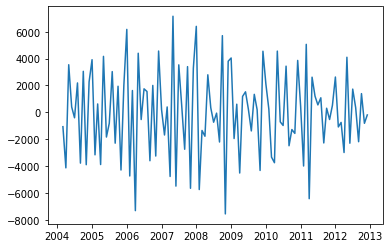

In [7]:
plt.plot(series)

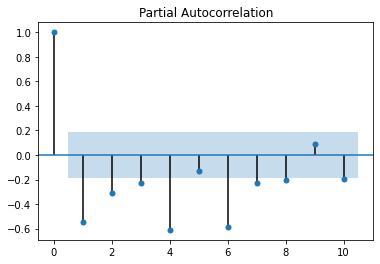

In [8]:
plot_pacf(series, lags=10)
plt.show()

**Either AR(1), AR(4), AR(6), or AR(10)**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


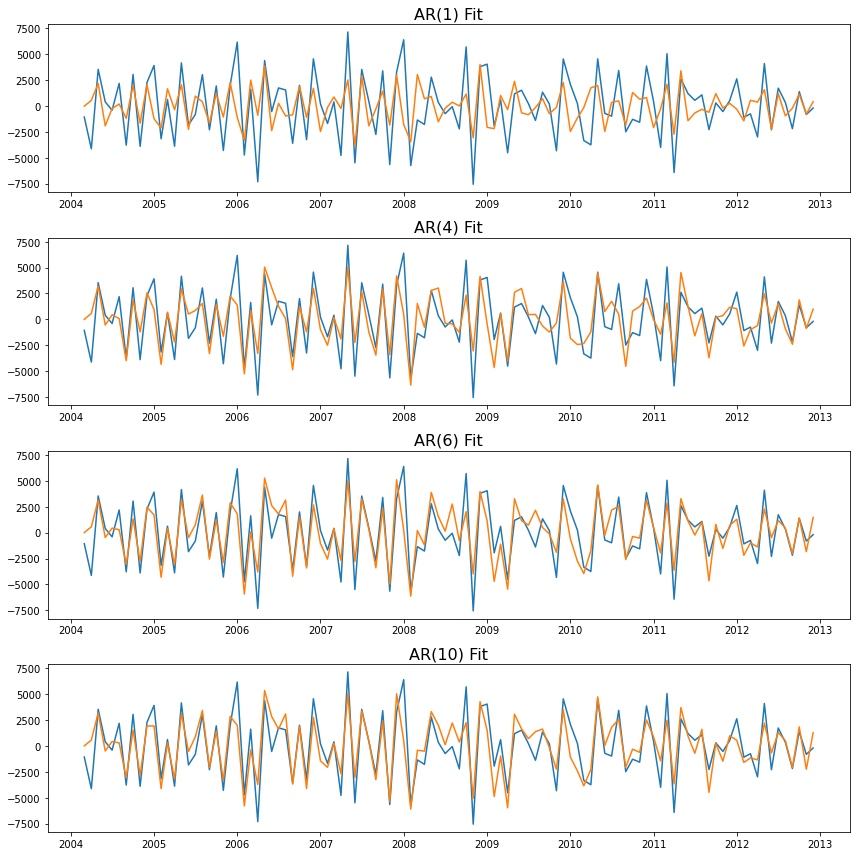

In [9]:
plt.figure(figsize=(12,12))

ar_orders = [1, 4, 6, 10]
fitted_model_dict = {}

for idx, ar_order in enumerate(ar_orders):
    
    #create AR(p) model
    ar_model = ARMA(series, order=(ar_order,0))
    ar_model_fit = ar_model.fit()
    fitted_model_dict[ar_order] = ar_model_fit
    plt.subplot(4,1,idx+1)
    plt.plot(series)
    plt.plot(ar_model_fit.fittedvalues)
    plt.title('AR(%s) Fit'%ar_order, fontsize=16)

plt.tight_layout()

**Each model has:**

a log likelihood (l) <br>
Measures how strong the model is in fitting data. Generally the more complicated the model the better fits data. <br>
But we have to becareful that the more complicated the model will be fine on training data but it will not work on the testing data well.<br>
So we need to incorporate the k (the number of parameter) to our model.<br>
For example for AR(6) we have 6 parameters + a constant.<br>
So model 1 is simple with less parameter with not very well firring, but it may not have the overfitting problem. In the other hand in AR(10) we have very goof fit but we may have overfitting problem.<br>

a number of parameters (k) <br>

a number of samples used for fitting (n) <br>

For the AIC we tray to make it as small as possible  and we pick the one which is as small as possible.<br> 
That means we are looking for the model that has a small number of k but high in the number of l.<br >
AIC = 2k - 2l <br>

Lower AIC via higher log liklihood or less parameters <br>

BIC = ln(n)k - 2l <br>

lower BIC via higher log liklihood or less parameters or less samples used in fitting<br>

So base on BIC and AIC below we choose AR(6). Although AR(10) seems is better for four extra parameter seems AR(6) is a better option.

In [10]:
#AIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].aic))

AIC for AR(1): 1980.8563115130303
AIC for AR(4): 1927.4507590378407
AIC for AR(6): 1899.6302660397682
AIC for AR(10): 1902.264791247062


In [11]:
#BIC comparison
for ar_order in ar_orders:
    print('AIC for AR(%s): %s'%(ar_order, fitted_model_dict[ar_order].bic))

AIC for AR(1): 1988.8466287953665
AIC for AR(4): 1943.431393602513
AIC for AR(6): 1920.9377787926649
AIC for AR(10): 1934.2260603764068
